In [1]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import scipy 
from scipy import stats
from scipy.stats import norm, skew

In [2]:
#Importing Data
df = pd.read_csv('clean_kaggle_data.csv')
#Exploring Data
# print(df.head())
# print(df.describe())

C:\Users\souren\AppData\Local\Temp\ipykernel_32708\2554692860.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')
C:\Users\souren\AppData\Local\Temp\ipykernel_32708\2554692860.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


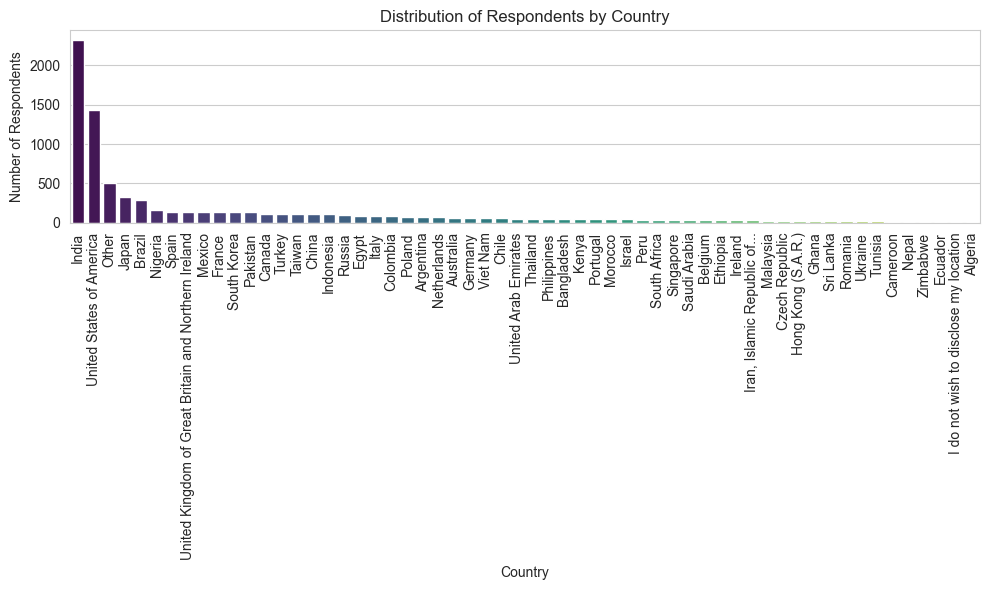

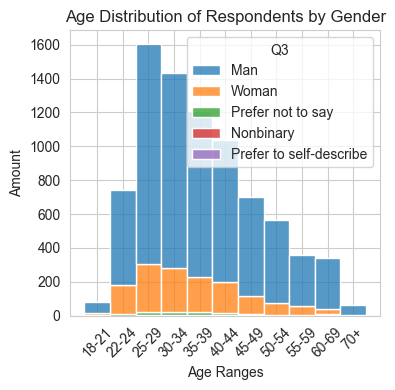

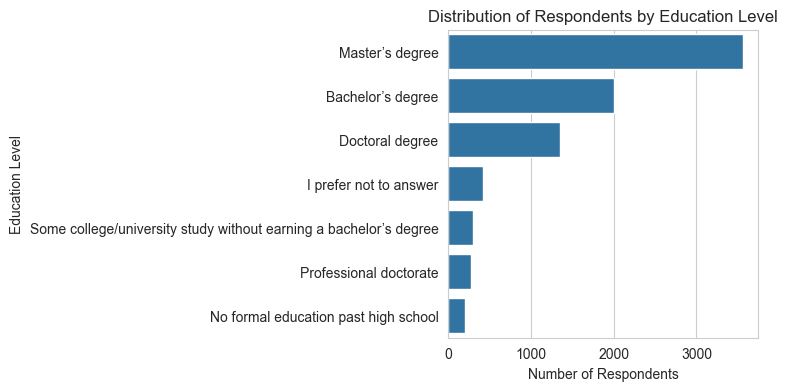

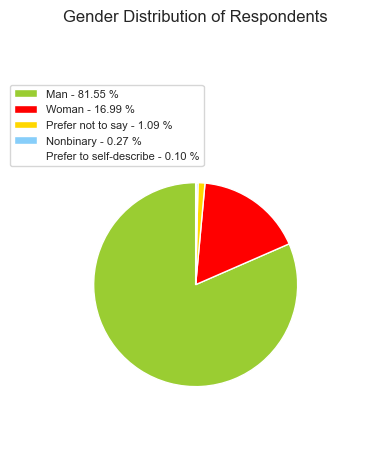

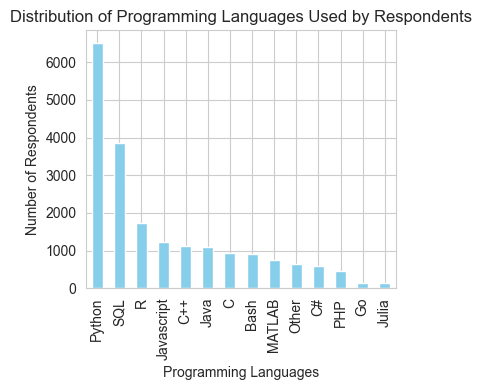

In [3]:
#Q1
# Setting the aesthetics for the plots
# sns.set_style('whitegrid')

# # 1. Distribution of respondents across countries
# plt.figure(figsize=(4, 10))
# country_order = df['Q4'].value_counts().index
# sns.countplot(data=df, y='Q4', order=country_order)
# plt.title('Distribution of Respondents by Country')
# plt.xlabel('Number of Respondents')
# plt.ylabel('Country')
# plt.show()

sns.set_style('whitegrid')

# 1. Distribution of respondents across countries
plt.figure(figsize=(10, 6))  # Adjust the figsize to make it horizontal and give more space
country_counts = df['Q4'].value_counts()
ax = sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')

# Rotate x-axis labels to 90 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.title('Distribution of Respondents by Country')
plt.xlabel('Country')
plt.ylabel('Number of Respondents')
plt.tight_layout()  # Ensure proper spacing
plt.show()


# 2. Age distribution of the respondents
# Mapping age ranges to representative values
age_mapping = {
    '18-21': '18-21',
    '22-24': '22-24',
    '25-29': '25-29',
    '30-34': '30-34',
    '35-39': '35-39',
    '40-44': '40-44',
    '45-49': '45-49',
    '50-54': '50-54',
    '55-59': '55-59',
    '60-69': '60-69',
    '70+': '70+'
}

# The mapping is redundant at this point, but I've kept it for clarity.
df['age_ranges'] = df['Q2'].replace(age_mapping)

# Sorting the dataframe based on the age ranges
df = df.sort_values(by='age_ranges', key=lambda x: x.map({v: i for i, v in enumerate(age_mapping.keys())}))

# Using the age ranges directly for plotting
plt.figure(figsize=(4, 4))
sns.histplot(data=df, x='age_ranges', hue='Q3', multiple="stack", discrete=True)
plt.title('Age Distribution of Respondents by Gender')
plt.xlabel('Age Ranges')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Distribution of educational qualifications
plt.figure(figsize=(4, 4))
education_order = df['Q8'].value_counts().index
sns.countplot(data=df, y='Q8', order=education_order)
plt.title('Distribution of Respondents by Education Level')
plt.xlabel('Number of Respondents')
plt.ylabel('Education Level')
plt.show()

# 4. Gender distribution of the respondents (Updated)
gender_count = df['Q3'].value_counts()
y = gender_count.values
x = gender_count.index

colors = ['yellowgreen','red','gold','lightskyblue','white','lightcoral','blue','pink']
porcent = 100.*y/y.sum()

patches, texts = plt.pie(y, colors=colors, startangle=90, radius=0.8)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='center left', bbox_to_anchor=(-0.1, 1.), fontsize=8)

# Increase the vertical space for the title by adjusting the 'y' position
plt.title('Gender Distribution of Respondents', y=1.3)  # Adjust the y position of the title

plt.tight_layout()
plt.savefig('gender_piechart.png', bbox_inches='tight')





#5 Programming language U Salary 
# Concatenating the columns Q12_1 to Q12_15 to get a single series
programming_languages = df[['Q12_1', 'Q12_2', 'Q12_3', 'Q12_4', 'Q12_5', 'Q12_6', 'Q12_7', 'Q12_8', 'Q12_9', 'Q12_10', 'Q12_11', 'Q12_12', 'Q12_13', 'Q12_14', 'Q12_15']].stack()

# Getting the frequency of each language
language_counts = programming_languages.value_counts()

# Plotting the series as a bar chart
plt.figure(figsize=(4, 4))
language_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Programming Languages Used by Respondents')
plt.xlabel('Programming Languages')
plt.ylabel('Number of Respondents')
plt.tight_layout()
plt.show()



Man's Descriptive Statistics:
 count      6509.000000
mean      53151.098479
std       64902.774841
min        1000.000000
25%        5000.000000
50%       25000.000000
75%       80000.000000
max      300000.000000
Name: Q29, dtype: float64

Woman's Descriptive Statistics:
 count      1366.000000
mean      40781.478770
std       57440.289248
min        1000.000000
25%        2000.000000
50%       15000.000000
75%       60000.000000
max      300000.000000
Name: Q29, dtype: float64

T-statistic: 7.06832573890473
P-value: 2.1074785983355064e-12
The difference between average salaries is statistically significant.


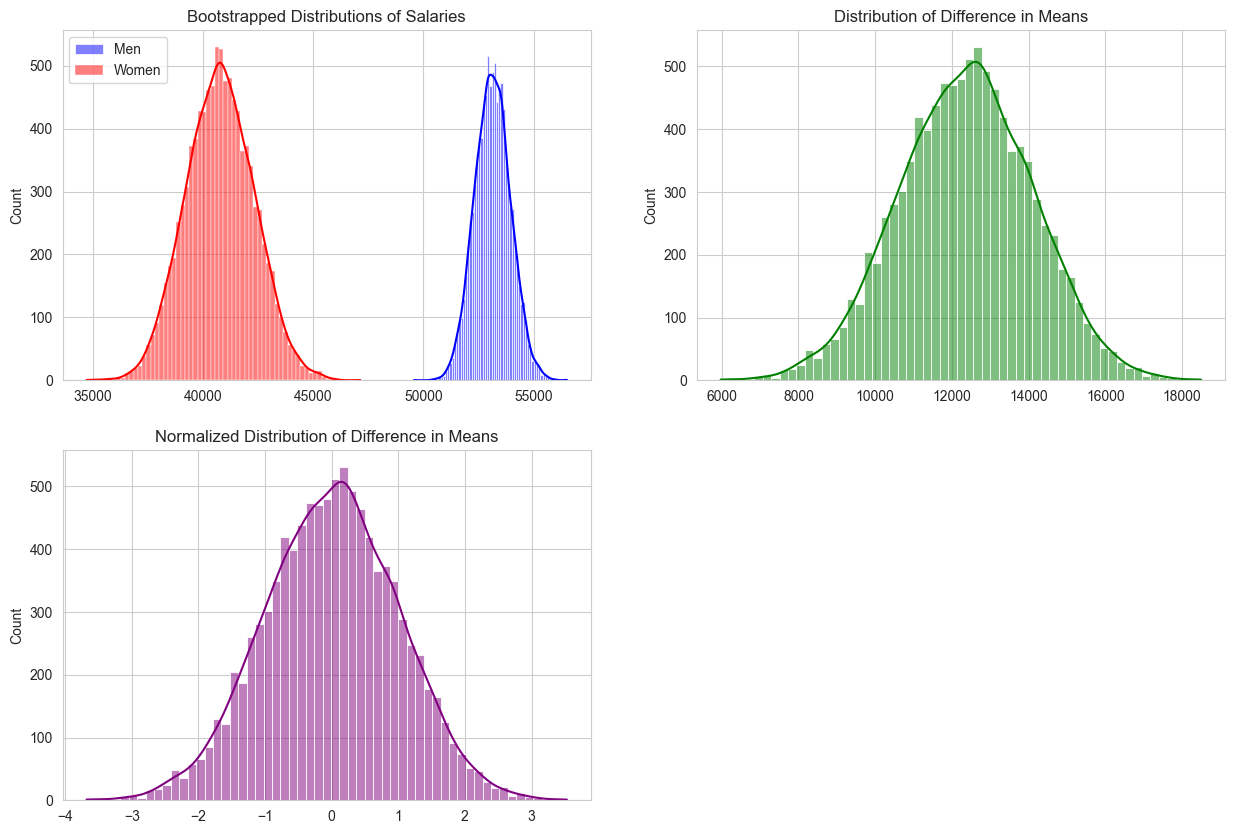


Bootstrap T-statistic: 709.8369168482594
Bootstrap P-value: 0.0
The difference between bootstrapped average salaries is statistically significant.

Comparison of T-values and P-values:
Original T-statistic: 7.06832573890473
Original P-value: 2.1074785983355064e-12
Bootstrap T-statistic: 709.8369168482594
Bootstrap P-value: 0.0


In [4]:
#Q2

# Read CSV (overwrite to make sure)
df = pd.read_csv('clean_kaggle_data.csv')

# a. Compute and report descriptive statistics for each group
# ------------------------------------------------------------------------------

# Drop rows with missing data
df_clean = df.dropna(subset=['Q3', 'Q29'])

# Removing outliers using Z-score
z_scores = np.abs(stats.zscore(df_clean['Q29']))
df_clean = df_clean[(z_scores < 3)]

# Compute descriptive statistics for each group
man_stats = df_clean[df_clean['Q3'] == 'Man']['Q29'].describe()
woman_stats = df_clean[df_clean['Q3'] == 'Woman']['Q29'].describe()

print("Man's Descriptive Statistics:\n", man_stats)
print("\nWoman's Descriptive Statistics:\n", woman_stats)

# b. Perform a two-sample t-test with a 0.05 threshold
# ------------------------------------------------------------------------------

man_salaries = df_clean[df_clean['Q3'] == 'Man']['Q29']
woman_salaries = df_clean[df_clean['Q3'] == 'Woman']['Q29']

t_stat, p_val = stats.ttest_ind(man_salaries, woman_salaries, equal_var=False)

print(f'\nT-statistic: {t_stat}\nP-value: {p_val}')

if p_val < 0.05:
    print("The difference between average salaries is statistically significant.")
else:
    print("The difference between average salaries is not statistically significant.")

# c. Bootstrap the data
# ------------------------------------------------------------------------------

def bootstrap(data, n_bootstrap):
    return np.random.choice(data, size=(n_bootstrap, len(data)), replace=True)

n_bootstrap = 10000

man_bootstrap_means = np.mean(bootstrap(man_salaries, n_bootstrap), axis=1)
woman_bootstrap_means = np.mean(bootstrap(woman_salaries, n_bootstrap), axis=1)
difference_means = man_bootstrap_means - woman_bootstrap_means
normalized_difference = (difference_means - np.mean(difference_means)) / np.std(difference_means)

# Plot the bootstrapped distributions
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.histplot(man_bootstrap_means, color='blue', kde=True, label='Men')
sns.histplot(woman_bootstrap_means, color='red', kde=True, label='Women')
plt.legend()
plt.title('Bootstrapped Distributions of Salaries')

plt.subplot(2, 2, 2)
sns.histplot(difference_means, color='green', kde=True)
plt.title('Distribution of Difference in Means')

plt.subplot(2, 2, 3)
sns.histplot(normalized_difference, color='purple', kde=True)
plt.title('Normalized Distribution of Difference in Means')
plt.show()

# d. Perform a two-sample t-test on the bootstrapped data
# ------------------------------------------------------------------------------

t_stat_bootstrap, p_val_bootstrap = stats.ttest_ind(man_bootstrap_means, woman_bootstrap_means, equal_var=False)

print(f'\nBootstrap T-statistic: {t_stat_bootstrap}\nBootstrap P-value: {p_val_bootstrap}')

if p_val_bootstrap < 0.05:
    print("The difference between bootstrapped average salaries is statistically significant.")
else:
    print("The difference between bootstrapped average salaries is not statistically significant.")

print(f"\nComparison of T-values and P-values:\nOriginal T-statistic: {t_stat}\nOriginal P-value: {p_val}\nBootstrap T-statistic: {t_stat_bootstrap}\nBootstrap P-value: {p_val_bootstrap}")


In [5]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Read the dataset
# df = pd.read_csv('clean_kaggle_data.csv')

# # Filtering for relevant data
# df_clean = df.dropna(subset=['Q3', 'Q29'])
# df_men = df_clean[df_clean['Q3'] == 'Man']
# df_women = df_clean[df_clean['Q3'] == 'Woman']

# # Extracting salaries
# man_salaries = df_men['Q29']
# woman_salaries = df_women['Q29']

# # Calculate means
# mean_men = man_salaries.mean()
# mean_women = woman_salaries.mean()

# # Plotting
# labels = ['Men', 'Women']
# means = [mean_men, mean_women]

# plt.bar(labels, means, color=['blue', 'pink'])
# plt.ylabel('Mean Salary')
# plt.title('Mean Salary for Men and Women')
# plt.show()


In [6]:
# # Plotting
# plt.figure(figsize=(10, 8))

# # Plot 1: Bootstrapped Distributions of Salaries
# plt.subplot(2, 2, 1)
# sns.histplot(man_bootstrap_means, color='blue', kde=True, label='Men')
# sns.histplot(woman_bootstrap_means, color='red', kde=True, label='Women')
# plt.legend(fontsize=12)
# plt.title('Bootstrapped Distributions of Salaries', fontsize=14)
# plt.xlabel('Salary', fontsize=12)
# plt.ylabel('Frequency', fontsize=12)

# # Plot 2: Distribution of Difference in Means
# plt.subplot(2, 2, 2)
# sns.histplot(difference_means, color='green', kde=True)
# plt.title('Distribution of Difference in Means', fontsize=14)
# plt.xlabel('Salary Difference', fontsize=12)
# plt.ylabel('Frequency', fontsize=12)

# # Plot 3: Normalized Distribution of Difference in Means
# plt.subplot(2, 2, 3)
# sns.histplot(normalized_difference, color='purple', kde=True)
# plt.title('Normalized Distribution of Difference in Means', fontsize=14)
# plt.xlabel('Normalized Salary Difference', fontsize=12)
# plt.ylabel('Frequency', fontsize=12)

# # Plot 4: Mean Salary Comparison
# plt.subplot(2, 2, 4)
# labels = ['Men', 'Women']
# means = [mean_men, mean_women]
# plt.bar(labels, means, color=['blue', 'pink'])
# plt.title('Mean Salary for Men and Women', fontsize=14)
# plt.ylabel('Mean Salary', fontsize=12)
# plt.xlabel('Gender', fontsize=12)

# plt.tight_layout()
# plt.show()

Bachelor’s degree Descriptive Statistics:
 count       2005.000000
mean       53855.112219
std       115708.228065
min         1000.000000
25%         3000.000000
50%        15000.000000
75%        60000.000000
max      1000000.000000
Name: Q29, dtype: float64

Master’s degree Descriptive Statistics:
 count       3567.000000
mean       65620.128960
std       108747.716468
min         1000.000000
25%         7500.000000
50%        30000.000000
75%        80000.000000
max      1000000.000000
Name: Q29, dtype: float64

Doctoral degree Descriptive Statistics:
 count       1349.000000
mean       84376.945886
std       131631.895507
min         1000.000000
25%         7500.000000
50%        50000.000000
75%       100000.000000
max      1000000.000000
Name: Q29, dtype: float64

F-statistic: 28.152539364189636
P-value: 6.652646073250012e-13


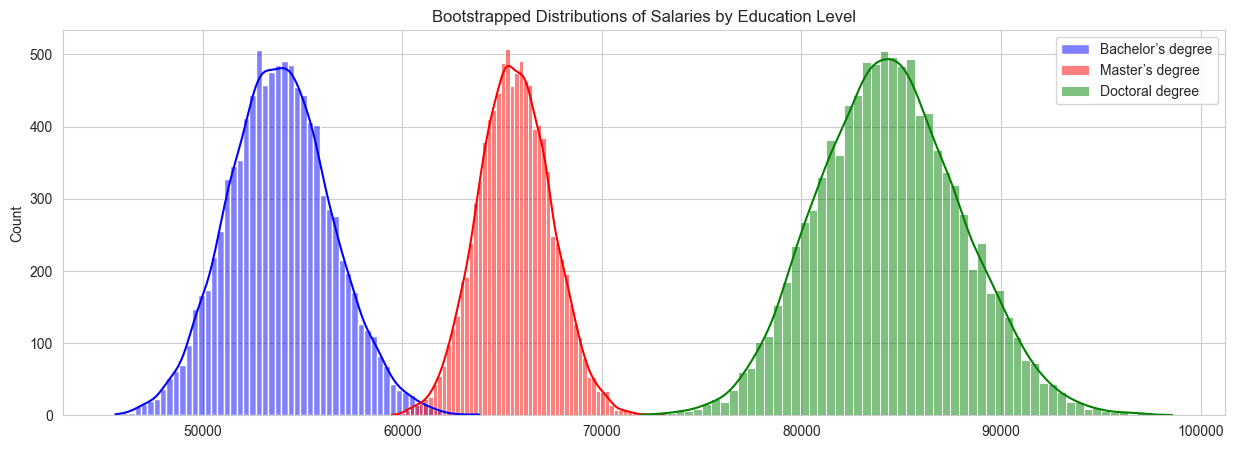


Bootstrap F-statistic: 311510.27923351113
Bootstrap P-value: 0.0

Comparison of F-values and P-values:
Original F-statistic: 28.152539364189636
Original P-value: 6.652646073250012e-13
Bootstrap F-statistic: 311510.27923351113
Bootstrap P-value: 0.0


In [7]:
#Q3
# Read the dataset
df = pd.read_csv('clean_kaggle_data.csv')

# a. Compute and report descriptive statistics for each group
# ------------------------------------------------------------------------------

# Filter data only for the three degrees of interest
degrees = ['Bachelor’s degree', 'Master’s degree', 'Doctoral degree']
df_clean = df[df['Q8'].isin(degrees)]

# Drop rows with missing data
df_clean = df_clean.dropna(subset=['Q8', 'Q29'])

bachelors_stats = df_clean[df_clean['Q8'] == 'Bachelor’s degree']['Q29'].describe()
masters_stats = df_clean[df_clean['Q8'] == 'Master’s degree']['Q29'].describe()
doctoral_stats = df_clean[df_clean['Q8'] == 'Doctoral degree']['Q29'].describe()

print("Bachelor’s degree Descriptive Statistics:\n", bachelors_stats)
print("\nMaster’s degree Descriptive Statistics:\n", masters_stats)
print("\nDoctoral degree Descriptive Statistics:\n", doctoral_stats)

# b. ANOVA for hypothesis testing
# ------------------------------------------------------------------------------

f_stat, p_val = stats.f_oneway(
    df_clean[df_clean['Q8'] == 'Bachelor’s degree']['Q29'],
    df_clean[df_clean['Q8'] == 'Master’s degree']['Q29'],
    df_clean[df_clean['Q8'] == 'Doctoral degree']['Q29']
)

print(f'\nF-statistic: {f_stat}\nP-value: {p_val}')

# c. Bootstrap the data
# ------------------------------------------------------------------------------

def bootstrap(data, n_bootstrap):
    return np.random.choice(data, size=(n_bootstrap, len(data)), replace=True)

n_bootstrap = 10000

bachelors_bootstrap_means = np.mean(bootstrap(df_clean[df_clean['Q8'] == 'Bachelor’s degree']['Q29'], n_bootstrap), axis=1)
masters_bootstrap_means = np.mean(bootstrap(df_clean[df_clean['Q8'] == 'Master’s degree']['Q29'], n_bootstrap), axis=1)
doctoral_bootstrap_means = np.mean(bootstrap(df_clean[df_clean['Q8'] == 'Doctoral degree']['Q29'], n_bootstrap), axis=1)

# Plot the bootstrapped distributions
plt.figure(figsize=(15, 5))
sns.histplot(bachelors_bootstrap_means, color='blue', kde=True, label='Bachelor’s degree')
sns.histplot(masters_bootstrap_means, color='red', kde=True, label='Master’s degree')
sns.histplot(doctoral_bootstrap_means, color='green', kde=True, label='Doctoral degree')
plt.legend()
plt.title('Bootstrapped Distributions of Salaries by Education Level')
plt.show()

# d. ANOVA on the bootstrapped data
# ------------------------------------------------------------------------------

f_stat_bootstrap, p_val_bootstrap = stats.f_oneway(bachelors_bootstrap_means, masters_bootstrap_means, doctoral_bootstrap_means)

print(f'\nBootstrap F-statistic: {f_stat_bootstrap}\nBootstrap P-value: {p_val_bootstrap}')

# e. Comparison of F-values and P-values
# ------------------------------------------------------------------------------

print(f"\nComparison of F-values and P-values:\nOriginal F-statistic: {f_stat}\nOriginal P-value: {p_val}\nBootstrap F-statistic: {f_stat_bootstrap}\nBootstrap P-value: {p_val_bootstrap}")

